# TechCrush - Data Science Task 3
## Pizza sales dataset

In [47]:
import numpy as  np # this library helps in data wrangling and indexing
import pandas as pd ## this Python library helps in data manipulation.
import matplotlib.pyplot as plt ## used for visualization
import seaborn as sns ## used for visualization built upon matlplotlib

In [9]:
## the file came in as a zip file, i downloaded and unzipped, the load the dataset one at a time using the .read_csv.

order_details = pd.read_csv(r"C:\Users\Johnson Samuel D\Desktop\TechCrush\Pizza+Place+Sales\pizza_sales\order_details.csv")
orders = pd.read_csv(r"C:\Users\Johnson Samuel D\Desktop\TechCrush\Pizza+Place+Sales\pizza_sales\orders.csv")
pizza_types = pd.read_csv(r"C:\Users\Johnson Samuel D\Desktop\TechCrush\Pizza+Place+Sales\pizza_sales\pizza_types.csv", encoding="latin1")
pizzas = pd.read_csv(r"C:\Users\Johnson Samuel D\Desktop\TechCrush\Pizza+Place+Sales\pizza_sales\pizzas.csv")

In [10]:
order_details

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


## The first step is to join the tables
- This needs to follow a systematic flow.
    - pizza_types → pizzas → order_details → orders


In [11]:
pizza_full = pd.merge(pizza_types,pizzas, on="pizza_type_id", how="left") ## add the pizza  to it's category

pizza_full

,pizza_type_id,name,category,ingredients,pizza_id,size,price
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75
1,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_m,M,16.75
2,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_l,L,20.75
3,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",cali_ckn_s,S,12.75
4,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",cali_ckn_m,M,16.75
...,...,...,...,...,...,...,...
91,spinach_fet,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G...",spinach_fet_m,M,16.00
92,spinach_fet,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G...",spinach_fet_l,L,20.25
93,veggie_veg,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",veggie_veg_s,S,12.00
94,veggie_veg,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",veggie_veg_m,M,16.00


In [12]:
order_pizza = pd.merge(order_details, pizza_full, on="pizza_id", how="left") ## adds product details to each transaction

order_pizza

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,name,category,ingredients,size,price
0,1,1,hawaiian_m,1,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25
1,2,2,classic_dlx_m,1,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",M,16.00
2,3,2,five_cheese_l,1,five_cheese,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",L,18.50
3,4,2,ital_supr_l,1,ital_supr,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",L,20.75
4,5,2,mexicana_m,1,mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",M,16.00
...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",M,16.75
48616,48617,21348,four_cheese_l,1,four_cheese,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",L,17.95
48617,48618,21348,napolitana_s,1,napolitana,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",S,12.00
48618,48619,21349,mexicana_l,1,mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",L,20.25


In [13]:
final_df = pd.merge(order_pizza, orders, on="order_id", how="left")

final_df

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,name,category,ingredients,size,price,date,time
0,1,1,hawaiian_m,1,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",M,16.00,2015-01-01,11:57:40
2,3,2,five_cheese_l,1,five_cheese,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",L,18.50,2015-01-01,11:57:40
3,4,2,ital_supr_l,1,ital_supr,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",L,20.75,2015-01-01,11:57:40
4,5,2,mexicana_m,1,mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",M,16.00,2015-01-01,11:57:40
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",M,16.75,2015-12-31,21:23:10
48616,48617,21348,four_cheese_l,1,four_cheese,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",L,17.95,2015-12-31,21:23:10
48617,48618,21348,napolitana_s,1,napolitana,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",S,12.00,2015-12-31,21:23:10
48618,48619,21349,mexicana_l,1,mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",L,20.25,2015-12-31,22:09:54


## Data Cleaning

In [14]:
final_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  str    
 3   quantity          48620 non-null  int64  
 4   pizza_type_id     48620 non-null  str    
 5   name              48620 non-null  str    
 6   category          48620 non-null  str    
 7   ingredients       48620 non-null  str    
 8   size              48620 non-null  str    
 9   price             48620 non-null  float64
 10  date              48620 non-null  str    
 11  time              48620 non-null  str    
dtypes: float64(1), int64(3), str(8)
memory usage: 4.5 MB


In [15]:
final_df["time"].value_counts()

time
12:32:00    26
11:59:10    24
12:52:36    23
12:53:29    23
12:26:04    23
            ..
18:36:06     1
19:17:49     1
19:46:24     1
19:52:09     1
22:09:54     1
Name: count, Length: 16382, dtype: int64

In [16]:
final_df.isnull().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
pizza_type_id       0
name                0
category            0
ingredients         0
size                0
price               0
date                0
time                0
dtype: int64

## BUSINESS QUESTIONS ANSWERED
## 1. What is the total revenue/sales?

In [17]:
final_df["Revenue"] = final_df["quantity"] * final_df["price"] ## to calculate the revenue, i got the product of price and quantity.

final_df

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,name,category,ingredients,size,price,date,time,Revenue
0,1,1,hawaiian_m,1,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,2015-01-01,11:38:36,13.25
1,2,2,classic_dlx_m,1,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",M,16.00,2015-01-01,11:57:40,16.00
2,3,2,five_cheese_l,1,five_cheese,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",L,18.50,2015-01-01,11:57:40,18.50
3,4,2,ital_supr_l,1,ital_supr,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",L,20.75,2015-01-01,11:57:40,20.75
4,5,2,mexicana_m,1,mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",M,16.00,2015-01-01,11:57:40,16.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",M,16.75,2015-12-31,21:23:10,16.75
48616,48617,21348,four_cheese_l,1,four_cheese,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",L,17.95,2015-12-31,21:23:10,17.95
48617,48618,21348,napolitana_s,1,napolitana,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",S,12.00,2015-12-31,21:23:10,12.00
48618,48619,21349,mexicana_l,1,mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",L,20.25,2015-12-31,22:09:54,20.25


In [18]:
total_revenue = final_df["Revenue"].sum() ## total revenue

print(f"The total revenue is {total_revenue}")

The total revenue is 817860.0499999999


## 2. Find the total quantity sold

In [19]:
total_quantity = final_df["quantity"].sum()

print(f"The total quantity sold is {total_quantity}")

The total quantity sold is 49574


## 3. Find the total orders.

In [20]:
total_order = final_df["order_id"].count() ## to the total order, i used the count method to find the total count_id

print(f"The total order is {total_order}")

The total order is 48620


## 4. How many pizza types do they sell?

In [21]:
pizza_types = final_df["pizza_type_id"].nunique()

print(f"The count of pizza type is {pizza_types}")

The count of pizza type is 32


## 5. Find the average price of the pizzas.

In [22]:
average_price = final_df["price"].sum()/len(final_df["price"])

print(f"The average price of pizzas is {average_price}")

The average price of pizzas is 16.494132044426163


## 6. What are the peak hours of sales?

In [23]:
final_df["date"] = final_df["date"].astype(str) ## the date column was converted to str to allow for concatenation
final_df["time"] = final_df["time"].astype(str)  ## the date column was converted to str

final_df["datetime"] = pd.to_datetime(final_df["date"] + " " + final_df["time"]) ## this is used to convert the column to datetime

In [24]:
final_df[["date", "time", "datetime"]].head()

,date,time,datetime
0,2015-01-01,11:38:36,2015-01-01 11:38:36
1,2015-01-01,11:57:40,2015-01-01 11:57:40
2,2015-01-01,11:57:40,2015-01-01 11:57:40
3,2015-01-01,11:57:40,2015-01-01 11:57:40
4,2015-01-01,11:57:40,2015-01-01 11:57:40


In [25]:
final_df["hour"] = final_df["datetime"].dt.hour

In [26]:
sales_by_hour = final_df.groupby("hour")["quantity"].sum()
sales_by_hour.sort_values(ascending=False)


hour
12    6776
13    6413
18    5417
17    5211
19    4406
16    4239
14    3613
20    3534
15    3216
11    2728
21    2545
22    1386
23      68
10      18
9        4
Name: quantity, dtype: int64

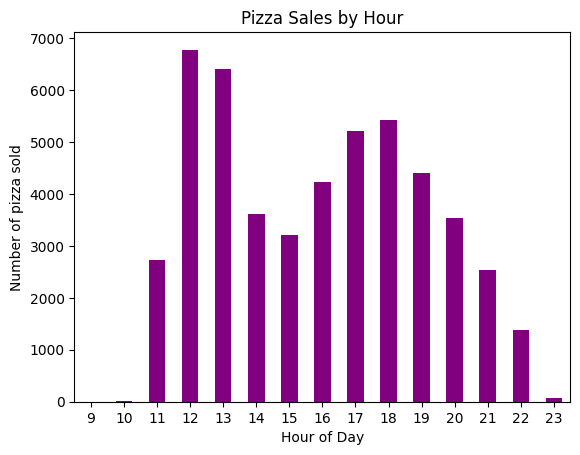

In [27]:
sales_by_hour.plot(kind="bar", color="purple")
plt.title("Pizza Sales by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of pizza sold")
plt.xticks(rotation=0)

plt.savefig("Pizza Sales by Hour.png", dpi=300, bbox_inches="tight")

plt.show()

## Insight

A. Peak Sales Period: The busiest time for sales occurs during the lunch rush, specifically between 12 PM and 1 PM. Sales hit their absolute peak at 12 PM with nearly 7,000 pizzas sold.
B. Operational Hours: The business sees almost no activity before 11 AM or after 10 PM. Sales drop off sharply after 8 PM (hour 20), reaching near-zero levels by 11 PM.

## Business Releverance

1. Dynamic Scheduling: The clear peaks at 12 PM (lunch) and 6 PM (dinner) indicate when the highest number of staff should be scheduled.
2. Inventory Prep: Knowing when demand spikes allow the kitchen to prepare adequate quantities of ingredients (dough, toppings) beforehand. 
3. Strategic Marketing and Revenue Growth
Targeted Promotions: To boost revenue during the mid-afternoon dip (around hour 15), the business could offer "Happy Hour" deals or mid-day snack promos.


## 7. Find the total sales made on each day of the week.

In [28]:
final_df["weekday"] = final_df["datetime"].dt.day_name()

In [29]:
pizzas_by_weekday = final_df.groupby("weekday")["quantity"].sum()
pizzas_by_weekday = pizzas_by_weekday.reindex( ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

pizzas_by_weekday

weekday
Monday       6485
Tuesday      6895
Wednesday    6946
Thursday     7478
Friday       8242
Saturday     7493
Sunday       6035
Name: quantity, dtype: int64

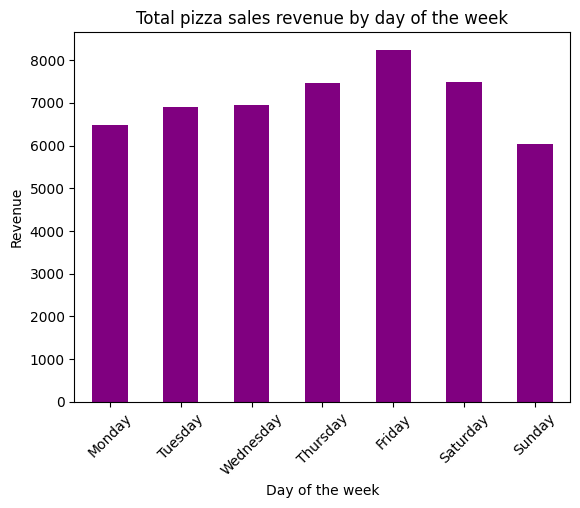

In [30]:
pizzas_by_weekday.plot(kind="bar", color="purple")
plt.title("Total pizza sales revenue by day of the week")
plt.xlabel("Day of the week")
plt.ylabel("Revenue")
plt.xticks(rotation=45)

plt.savefig("Total pizza sales revenue by day of the week.png", dpi=300, bbox_inches="tight")

plt.show()

## Insight

A. Peak Revenue Day: Friday is the highest-performing day of the week, with revenue peaking at over 8,000. This suggests a strong "end-of-the-week" demand, likely driven by social gatherings or "pizza night" traditions.

B. The Weekend Drop-off: Interestingly, revenue begins to decline after Friday. Saturday sees a slight dip (holding steady at around USD 7,500), while Sunday is the lowest-performing day of the entire week, falling to approximately 6,000.

C. Mid-Week Growth Trend: There is a steady, incremental increase in revenue as the week progresses, starting from Monday (USD 6,500) and climbing consistently through Thursday (USD 7,500).

## Business Releverance

1. Strategic Staffing & Inventory
- Peak Demand Prep: Since Friday is the clear revenue leader, ensure maximum staffing and inventory (dough, fresh ingredients) are ready for the high volume.

- Sunday Lean Ops: With Sunday being the lowest revenue day, you can reduce labor costs by scheduling a smaller crew or focusing that day on deep cleaning and weekly maintenance.

2. Revenue Growth Opportunities
- Sunday "Family Night" Promos: Sunday is a significant outlier on the low end. Launching "Family Bundle" deals  Sunday Football specials could help capture more market share on this typically slow day.

- Monday/Tuesday Retention: Use loyalty program rewards or "Buy One Get One" (BOGO) offers early in the week to maintain the momentum from Monday and Tuesday's baseline.


In [31]:
## Business Releverance



## 7. Which day of the week is when sales are made the most?

In [32]:
peak_day_revenue = pizzas_by_weekday.idxmax()
peak_revenue = pizzas_by_weekday.max()


In [33]:
print(f"{peak_day_revenue} as the highest sale, at {peak_revenue}")

Friday as the highest sale, at 8242


## 8. Find the top 5 bestselling pizzas.

In [34]:
top_pizzas = final_df.groupby("name")["quantity"].sum()

top_5_pizzas = top_pizzas.sort_values(ascending=False).head(5)

top_5_pizzas

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

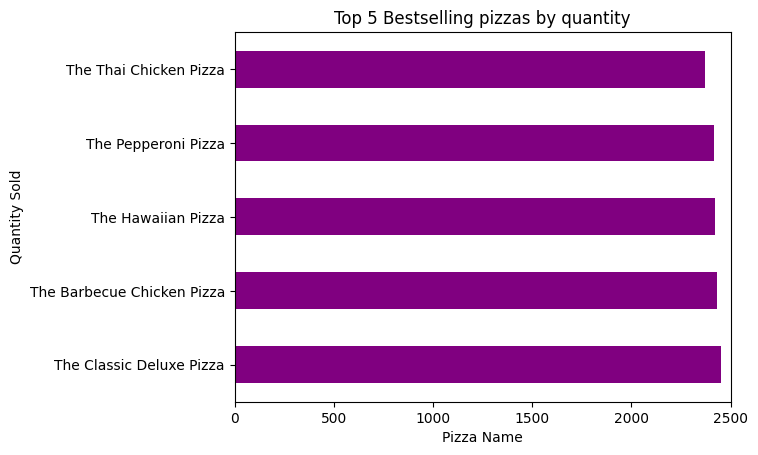

In [53]:
top_5_pizzas.plot(kind="barh", color="purple")
plt.title("Top 5 Bestselling pizzas by quantity")
plt.xlabel("Pizza Name")
plt.ylabel("Quantity Sold")
plt.xlim(0,2500)

plt.savefig("Top 5 Bestselling pizzas by quantity.png", dpi=300, bbox_inches="tight")

plt.show()

## 9. Find the sales made in each month. Any trend noticeable?

In [36]:
final_df["month"] = final_df["datetime"].dt.month
final_df["month_name"] = final_df["datetime"].dt.month_name()

In [37]:
monthly_quantity = final_df.groupby("month_name")["quantity"].sum()

monthly_quantity = monthly_quantity.reindex([
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
])

monthly_quantity

month_name
January      4232
February     3961
March        4261
April        4151
May          4328
June         4107
July         4392
August       4168
September    3890
October      3883
November     4266
December     3935
Name: quantity, dtype: int64

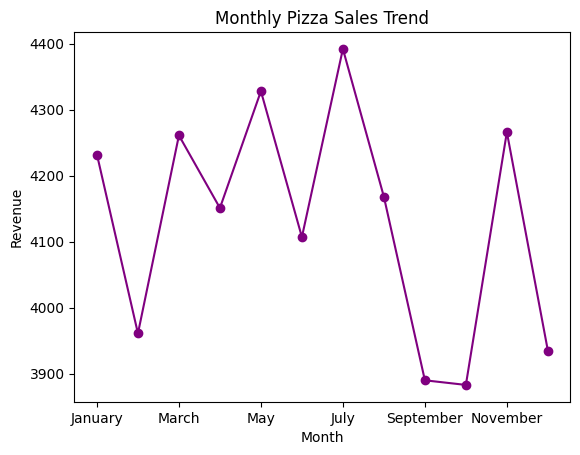

In [38]:
monthly_quantity.plot(kind="line", marker="o", color="purple")
plt.title("Monthly Pizza Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=0)

plt.savefig("Monthly Pizza Sales Trend.png", dpi=300, bbox_inches="tight")

plt.show()


## Insight

A. Peak Performance: Revenue reaches its absolute highest point in July, peaking at nearly USD 4,400. This suggests a strong summer demand.

B. The "Autumn Slump": There is a dramatic and sustained decline starting after July, reaching the yearly lows in September and October (dropping below USD 3,900).

C. Holiday Spike: There is a notable recovery in November, where revenue jumps back up to over $4,250, likely driven by holiday-related gatherings or promotions, before dipping again in December.


## Business Releverance

1. Seasonal Strategic Planning
- Maximize July Peaks: With July being the highest revenue month, ensure the business is "all hands on deck" with full staffing and inventory to capture peak summer demand.

- Combat the Autumn Slump: The sharp drop in September and October is a major vulnerability. This is the ideal time to launch aggressive "Back to School" promotions or local marketing campaigns to offset the seasonal dip.

2. Financial & Inventory Management
- Cash Flow Buffering: Use the high-revenue months (May, July, November) to build a cash reserve that carries the business through the leaner months of September and October.

- Inventory Adjustments: Tighten inventory orders in August to prepare for the September drop, preventing waste of perishable ingredients when volume decreases.

## 10. Are there pizza types that are not doing well on the menu?

In [39]:
pizza_performance = final_df.groupby("name")["quantity"].sum().sort_values()

print(pizza_performance.head(10))


name
The Brie Carre Pizza            490
The Mediterranean Pizza         934
The Calabrese Pizza             937
The Spinach Supreme Pizza       950
The Soppressata Pizza           961
The Spinach Pesto Pizza         970
The Chicken Pesto Pizza         973
The Italian Vegetables Pizza    981
The Chicken Alfredo Pizza       987
The Green Garden Pizza          997
Name: quantity, dtype: int64


In [40]:
final_df["revenue"] = final_df["price"] * final_df["quantity"]

pizza_revenue = final_df.groupby("name")["revenue"].sum().sort_values()

print(pizza_revenue.head(10))


name
The Brie Carre Pizza            11588.50
The Green Garden Pizza          13955.75
The Spinach Supreme Pizza       15277.75
The Mediterranean Pizza         15360.50
The Spinach Pesto Pizza         15596.00
The Calabrese Pizza             15934.25
The Italian Vegetables Pizza    16019.25
The Soppressata Pizza           16425.75
The Chicken Pesto Pizza         16701.75
The Chicken Alfredo Pizza       16900.25
Name: revenue, dtype: float64


## 11. Identify underperforming pizza statistically

In [41]:
threshold = pizza_revenue.quantile(0.20)

underperforming = pizza_revenue[pizza_revenue <=threshold]

underperforming 

name
The Brie Carre Pizza            11588.50
The Green Garden Pizza          13955.75
The Spinach Supreme Pizza       15277.75
The Mediterranean Pizza         15360.50
The Spinach Pesto Pizza         15596.00
The Calabrese Pizza             15934.25
The Italian Vegetables Pizza    16019.25
Name: revenue, dtype: float64

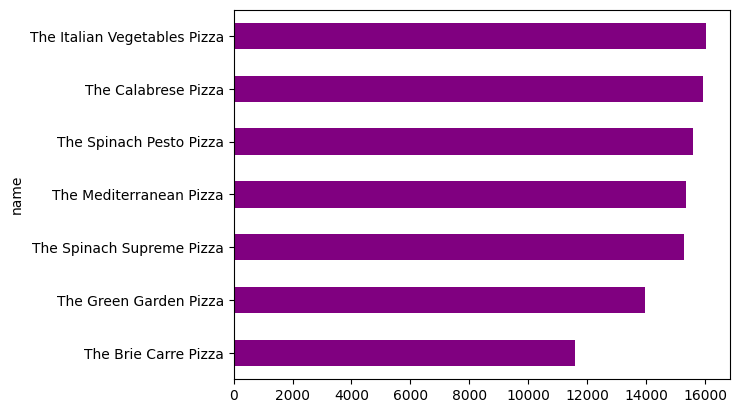

In [42]:
underperforming.plot(kind="barh",color="purple")

plt.show()

In [ ]:
## 